In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = 'Times New Roman'

Phy_hist = xr.open_dataset('./ECS_Phy_1990_2019_avg.nc')
Phy_2050_ssp1 = xr.open_dataset('./ECS_Phy_2050_ssp1.nc')
Phy_2050_ssp2 = xr.open_dataset('./ECS_Phy_2050_ssp2.nc')
Phy_2050_ssp5 = xr.open_dataset('./ECS_Phy_2050_ssp5.nc')
Phy_2100_ssp1 = xr.open_dataset('./ECS_Phy_2100_ssp1.nc')
Phy_2100_ssp2 = xr.open_dataset('./ECS_Phy_2100_ssp2.nc')
Phy_2100_ssp5 = xr.open_dataset('./ECS_Phy_2100_ssp5.nc')

Phy_list = [Phy_2050_ssp1, Phy_2050_ssp5, Phy_hist, Phy_2100_ssp1, Phy_2100_ssp5]

## Phy_SSP&Hist

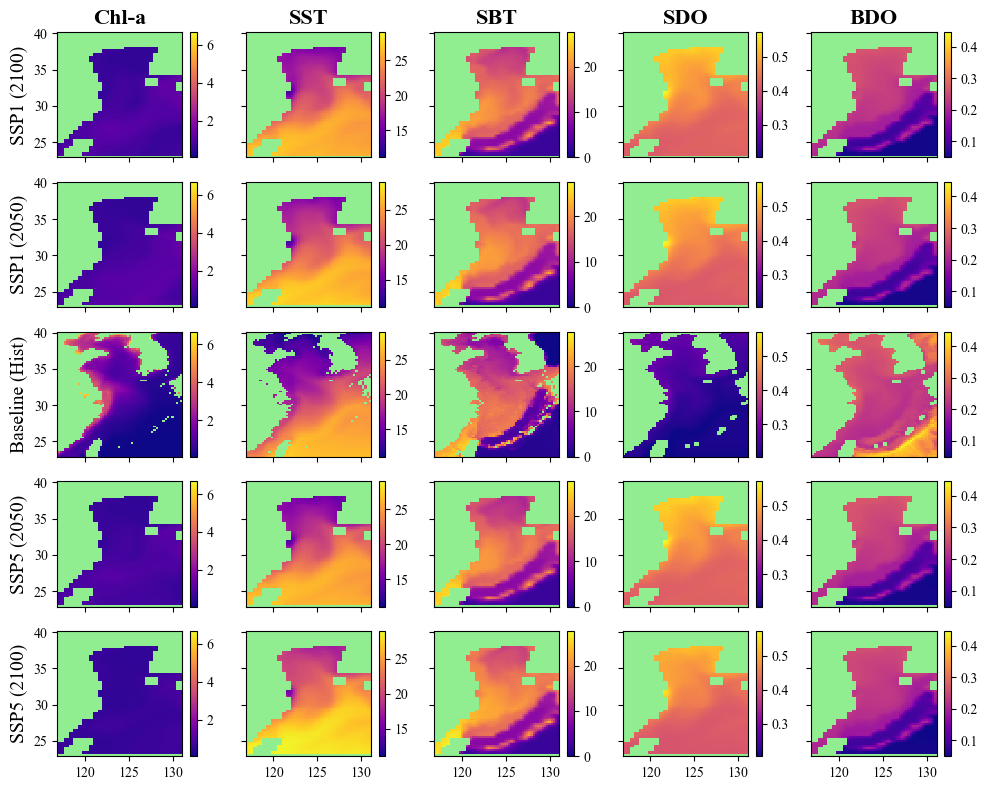

In [2]:
# SSP_labels = ['SSP1 (2100)', 'SSP1 (2050)', 'Baseline (Hist)', 'SSP5 (2050)', 'SSP5 (2100)']
# Phy_list = [Phy_2050_ssp1, Phy_2050_ssp5, Phy_hist, Phy_2100_ssp1, Phy_2100_ssp5]

# vmin_max = {
#     'CHL': {'vmin': np.inf, 'vmax': -np.inf},
#     'SST': {'vmin': np.inf, 'vmax': -np.inf},
#     'SBT': {'vmin': np.inf, 'vmax': -np.inf},
#     'SDO': {'vmin': np.inf, 'vmax': -np.inf},
#     'BDO': {'vmin': np.inf, 'vmax': -np.inf}
# }

# for phy_data in Phy_list:
#     for var in vmin_max.keys():
#         vmin_max[var]['vmin'] = min(vmin_max[var]['vmin'], phy_data[var].min().item())
#         vmin_max[var]['vmax'] = max(vmin_max[var]['vmax'], phy_data[var].max().item())

# fig, ax = plt.subplots(5, 5, figsize=(10, 8), sharey=True, sharex=True)

# for row_idx, phy_data in enumerate(Phy_list):
#     phy_data['CHL'].plot(ax=ax[row_idx, 0], cmap='plasma', 
#                          vmin=vmin_max['CHL']['vmin'], vmax=vmin_max['CHL']['vmax'], 
#                          cbar_kwargs={'label': ''})
#     phy_data['SST'].plot(ax=ax[row_idx, 1], cmap='plasma', 
#                          vmin=vmin_max['SST']['vmin'], vmax=vmin_max['SST']['vmax'], 
#                          cbar_kwargs={'label': ''})
#     phy_data['SBT'].plot(ax=ax[row_idx, 2], cmap='plasma', 
#                          vmin=vmin_max['SBT']['vmin'], vmax=vmin_max['SBT']['vmax'], 
#                          cbar_kwargs={'label': ''})
#     phy_data['SDO'].plot(ax=ax[row_idx, 3], cmap='plasma', 
#                          vmin=vmin_max['SDO']['vmin'], vmax=vmin_max['SDO']['vmax'], 
#                          cbar_kwargs={'label': ''})
#     phy_data['BDO'].plot(ax=ax[row_idx, 4], cmap='plasma', 
#                          vmin=vmin_max['BDO']['vmin'], vmax=vmin_max['BDO']['vmax'], 
#                          cbar_kwargs={'label': ''})

#     for col_idx, t in enumerate(['Chl', 'SST', 'SBT', 'SDO', 'BDO']):
#         ax[0, col_idx].set_title(f'{t}', fontsize=14, fontweight='bold')
#         ax[row_idx, col_idx].set_xlabel('')
#         if col_idx > 0:
#             ax[row_idx, col_idx].set_ylabel('')
#         else:
#             ax[row_idx, 0].set_ylabel(SSP_labels[row_idx], fontsize=12)

# plt.tight_layout()
# plt.savefig('./Figures/Figure_ch5-02.pdf', bbox_inches='tight')
# plt.savefig('./Figures/Figure_ch5-02.png', dpi=600, bbox_inches='tight')

SSP_labels = ['SSP1 (2100)', 'SSP1 (2050)', 'Baseline (Hist)', 'SSP5 (2050)', 'SSP5 (2100)']

# 变量及其全局最大最小值
vmin_max = {
    'CHL': {'vmin': np.inf, 'vmax': -np.inf},
    'SST': {'vmin': np.inf, 'vmax': -np.inf},
    'SBT': {'vmin': np.inf, 'vmax': -np.inf},
    'SDO': {'vmin': np.inf, 'vmax': -np.inf},
    'BDO': {'vmin': np.inf, 'vmax': -np.inf}
}

# 计算所有 SSP 数据的全局最小值和最大值
for phy_data in Phy_list:
    for var in vmin_max.keys():
        vmin_max[var]['vmin'] = min(vmin_max[var]['vmin'], phy_data[var].min().item())
        vmin_max[var]['vmax'] = max(vmin_max[var]['vmax'], phy_data[var].max().item())

# 创建 5x5 子图
fig, ax = plt.subplots(5, 5, figsize=(10, 8), sharey=True, sharex=True)

# 设置 colormap，并将 NaN（陆地）区域设为 lightgreen
cmap = plt.get_cmap('plasma').copy()
cmap.set_bad('lightgreen')  # NaN 显示为淡绿色

# 遍历每个 SSP 场景和变量
for row_idx, phy_data in enumerate(Phy_list):
    for col_idx, var in enumerate(['CHL', 'SST', 'SBT', 'SDO', 'BDO']):
        phy_data[var].plot(ax=ax[row_idx, col_idx], cmap=cmap, 
                           vmin=vmin_max[var]['vmin'], vmax=vmin_max[var]['vmax'], 
                           cbar_kwargs={'label': ''})

        # 设置标题（第一行）
        if row_idx == 0:
            if col_idx == 0:
                ax[0, 0].set_title('Chl-a', fontsize=16, fontweight='bold')
            else:
                ax[0, col_idx].set_title(f'{var}', fontsize=16, fontweight='bold')

        # 设置纵轴标签（第一列）
        if col_idx == 0:
            ax[row_idx, 0].set_ylabel(SSP_labels[row_idx], fontsize=14)

        # 移除 x 轴标签
        ax[row_idx, col_idx].set_xlabel('')

        # 除第一列外，移除 y 轴标签
        if col_idx > 0:
            ax[row_idx, col_idx].set_ylabel('')

plt.tight_layout()

# 保存图像
plt.savefig('./Figures/Figure_ch5-02.pdf', bbox_inches='tight')
plt.savefig('./Figures/Figure_ch5-02.png', dpi=600, bbox_inches='tight')

plt.show()

## Phy 历史

In [3]:
variables = ['CHL', 'SST', 'SBT', 'SDO', 'BDO']

for var in variables:
    fig, ax = plt.subplots(figsize=(2, 2))
    
    Phy_hist[var].plot(ax=ax, cmap=cmap, add_colorbar=False)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
    
    plt.savefig(f'./Figures/Figure_ch5-03_{var}.pdf', bbox_inches='tight', pad_inches=0)
    plt.savefig(f'./Figures/Figure_ch5-03_{var}.png', dpi=600, bbox_inches='tight', pad_inches=0)
    
    plt.close()

## Depth

In [4]:
# variables = ['Depth']

# for var in variables:
#     fig, ax = plt.subplots(figsize=(2, 2))
    
#     Phy_2050_ssp1[var].plot(ax=ax, cmap='plasma', add_colorbar=False)

#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_xlabel('')
#     ax.set_ylabel('')
#     ax.set_title('')
    
#     plt.savefig(f'./Figures/Figure_ch5-03_{var}.pdf', bbox_inches='tight', pad_inches=0)
#     plt.savefig(f'./Figures/Figure_ch5-03_{var}.png', dpi=600, bbox_inches='tight', pad_inches=0)
    
#     plt.close()

# 设置 colormap，并为 NaN（陆地）区域设为 lightgreen
cmap = plt.get_cmap('plasma').copy()
cmap.set_bad('lightgreen')  # 使 NaN 变成淡绿色

# 使用 SST 变量中的 NaN 作为 mask
land_mask = np.isnan(Phy_hist['SST'])

# 变量列表
variables = ['Depth']

for var in variables:
    fig, ax = plt.subplots(figsize=(2, 2))
    
    # 获取数据，并应用 mask
    masked_data = Phy_2050_ssp1[var].where(~land_mask)  # 仅保留非 NaN 部分
    
    # 绘制带有 mask 的图像
    masked_data.plot(ax=ax, cmap=cmap, add_colorbar=False)
    
    # 移除多余的标签
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
    
    # 保存图片
    plt.savefig(f'./Figures/Figure_ch5-03_{var}.pdf', bbox_inches='tight', pad_inches=0)
    plt.savefig(f'./Figures/Figure_ch5-03_{var}.png', dpi=600, bbox_inches='tight', pad_inches=0)
    
    plt.close()